<b> <center> NAME: NEELANJAN DUTTA <br>
<b> <center> REGISTER NUMBER: 2448040 <br> </center> </b>

<b> <center> MDS 471: Neural Networks and Deep Learning </center> </b>
<b> <center> LAB 5: CNN Implementation </center> </b>

<b>Program #1:<br>
Take a group image 4 or 5 in a group and Identify all the faces in
the group.Refer the following image and Instructions. <br>
1.Create a dataset with different images of the persons who
included in your group<br>
2.Apply all the Convolutional operations<br>
3.Identify all the faces in the picture<br>
4.Identify Unique features<br>
5.Compare identified features with your dataset and determine the
person's name. <br></b>

In [ ]:
!pip install deepface opencv-python retina-face

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=45def28ecb12c921e077b9084602dd80c5fd69f2691c3e29408102740975630e
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [ ]:
from google.colab import files
import zipfile
import os

# Upload a zip file containing your dataset folder (e.g., dataset.zip with subfolders per person)
uploaded = files.upload()

# Unzip it (assumes the uploaded file is named dataset.zip)
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Upload the group image
uploaded = files.upload()  # upload your group_photo.jpg

Saving dataset.zip to dataset.zip


Saving group_photo.jpg to group_photo.jpg


25-07-29 13:13:03 - Directory /root/.deepface has been created
25-07-29 13:13:03 - Directory /root/.deepface/weights has been created


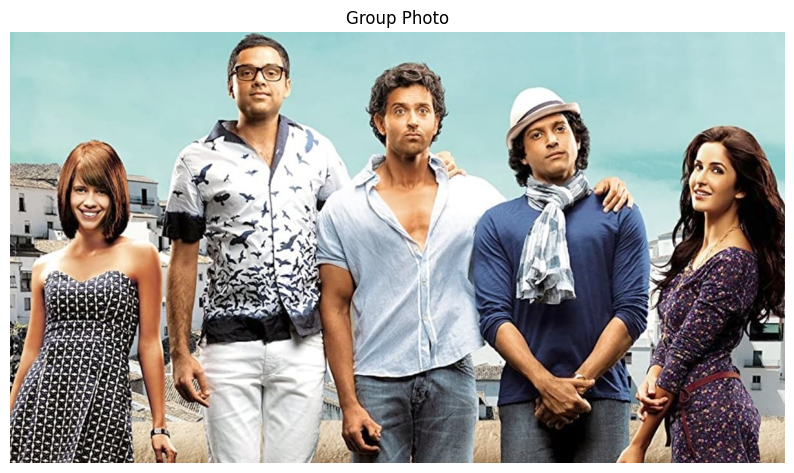

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

# STEP 1: Load and display group image
group_img_path = "group_photo.jpg"
group_img = cv2.imread(group_img_path)

# Check if the image was loaded successfully
if group_img is None:
    print(f"Error: Could not load image from {group_img_path}")
else:
    group_img_rgb = cv2.cvtColor(group_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(group_img_rgb)
    plt.title("Group Photo")
    plt.axis("off")
    plt.show()

25-07-29 13:13:15 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 237MB/s]


Detected 5 face(s) in group photo.


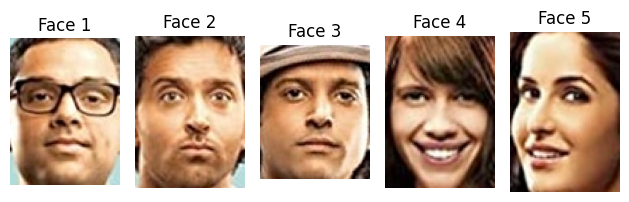

In [ ]:
# STEP 2: Detect all faces in the group photo
detections = DeepFace.extract_faces(img_path=group_img_path, detector_backend='retinaface', enforce_detection=False)

print(f"Detected {len(detections)} face(s) in group photo.")

# Show each face
for i, face in enumerate(detections):
    plt.subplot(1, len(detections), i + 1)
    plt.imshow(face["face"])
    plt.axis("off")
    plt.title(f"Face {i+1}")
plt.tight_layout()
plt.show()


In [ ]:
from deepface import DeepFace
import numpy as np
import os

dataset_path = "/content/dataset/dataset"  # Adjust if needed
known_faces = {}

for person in os.listdir(dataset_path):
    person_folder = os.path.join(dataset_path, person)
    if not os.path.isdir(person_folder):
        continue

    embeddings = []
    for img_file in os.listdir(person_folder):
        img_path = os.path.join(person_folder, img_file)
        try:
            rep = DeepFace.represent(img_path=img_path, model_name='Facenet', enforce_detection=True)
            embedding = rep[0]["embedding"]
            embeddings.append(embedding)

            # Debug print the embedding
            print(f"\n[+] Processed: {person}/{img_file}")
            print(f"    → Embedding: {embedding[:5]}... (length = {len(embedding)})")  # print first 5 values
        except Exception as e:
            print(f"[!] Skipping {img_file}: {e}")

    if embeddings:
        mean_embedding = np.mean(embeddings, axis=0)
        known_faces[person] = mean_embedding

        # Optional: print the averaged embedding
        print(f"\n[✓] Averaged embedding for {person}: {mean_embedding[:5]}... (length = {len(mean_embedding)})\n")

25-07-29 13:13:38 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:01<00:00, 80.8MB/s]



[+] Processed: Kalki Koechlin/image 4.jpeg
    → Embedding: [-2.613835573196411, -1.5134568214416504, 0.8992539644241333, -1.604133129119873, -0.2646793723106384]... (length = 128)

[+] Processed: Kalki Koechlin/image 6.jpeg
    → Embedding: [-1.0352553129196167, -0.5068174600601196, 0.29078125953674316, -1.445064663887024, -0.8194659352302551]... (length = 128)

[+] Processed: Kalki Koechlin/image 7.jpeg
    → Embedding: [-1.5564643144607544, -1.0661861896514893, 1.1556386947631836, -2.0363540649414062, -0.4487916827201843]... (length = 128)

[+] Processed: Kalki Koechlin/image 2.jpeg
    → Embedding: [-0.6068456172943115, -0.9286128282546997, 1.9487346410751343, -0.4716032147407532, -0.043053653091192245]... (length = 128)

[+] Processed: Kalki Koechlin/image 8.jpeg
    → Embedding: [-0.32107651233673096, -0.7761632204055786, 1.3151699304580688, -0.9236780405044556, -0.5326588749885559]... (length = 128)

[+] Processed: Kalki Koechlin/image 5.jpeg
    → Embedding: [-2.34325623512268

In [ ]:
# STEP 4: Match detected faces with known people and draw results on image
from scipy.spatial.distance import cosine

# Clone image to draw boxes
annotated_img = group_img_rgb.copy()

for i, face_data in enumerate(detections):
    face_img = face_data["face"]
    region = face_data["facial_area"]

    # Save and represent
    temp_path = f"/content/temp_face_{i}.jpg"
    face_bgr = cv2.cvtColor((face_img * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    cv2.imwrite(temp_path, face_bgr)

    try:
        rep = DeepFace.represent(img_path=temp_path, model_name="Facenet", enforce_detection=False)
        test_embedding = rep[0]["embedding"]

        best_match = "Unknown"
        best_score = 1  # Cosine distance (lower is better)

        for name, known_embedding in known_faces.items():
            score = cosine(test_embedding, known_embedding)
            if score < best_score:
                best_score = score
                best_match = name

        similarity = round((1 - best_score) * 100, 2)

        label = f"{best_match} ({similarity}%)"
        print(f"Face {i+1}: {label}")

        # Draw bounding box and label
        x, y, w, h = region["x"], region["y"], region["w"], region["h"]
        cv2.rectangle(annotated_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(annotated_img, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    except Exception as e:
        print(f"[!] Failed on face {i}: {e}")


Face 1: Abhay Deol (70.07%)
Face 2: Hrithik Roshan (67.18%)
Face 3: Farhan Akhtar (56.34%)
Face 4: Kalki Koechlin (78.56%)
Face 5: Katrina Kaif (69.89%)


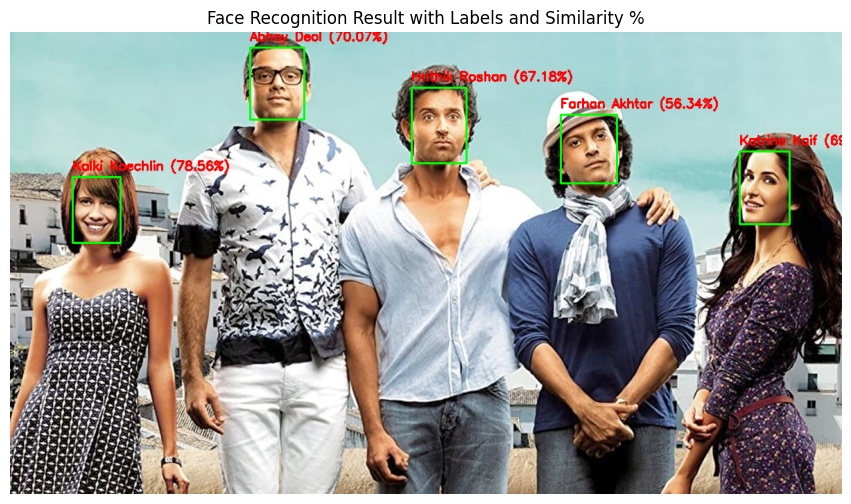

In [ ]:
# STEP 5: Show final annotated image
plt.figure(figsize=(12, 6))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("Face Recognition Result with Labels and Similarity %")
plt.show()

<b>Program #2:<br>
Image Recognition on CIFAR-10 Dataset using Custom CNN and AlexNet – Design, Implementation & Comparative Analysis.<br>
<br>
Design and implement an image classification system for the CIFAR-10 dataset
using:<br>
1. A custom-built Convolutional Neural Network (CNN) architecture of your
choice.<br>
2. The AlexNet architecture adapted for CIFAR-10.<br>
Train and evaluate both models on the dataset.<br>
    (i) Compare their performance based on test accuracy.<br>
    (ii) Summarize your observations on which model performs better and discuss possible reasons for the difference in performance.<br> </b>

In [ ]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load and Preprocess CIFAR-10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 8s 0us/step


In [ ]:
# Define Custom CNN
def create_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Define AlexNet Adapted for CIFAR-10
def create_alexnet():
    model = models.Sequential([
        layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Compile and Train Function
def train_and_evaluate(model, name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"\n Training {name}...")
    history = model.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_split=0.1, verbose=2)
    test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    return model, history, test_acc

In [ ]:
# Run Models
custom_model, history_custom, acc_custom = train_and_evaluate(create_custom_cnn(), "Custom CNN")
alexnet_model, history_alexnet, acc_alexnet = train_and_evaluate(create_alexnet(), "AlexNet")


 Training Custom CNN...
Epoch 1/15
704/704 - 5s - loss: 1.5291 - accuracy: 0.4525 - val_loss: 1.3187 - val_accuracy: 0.5408 - 5s/epoch - 7ms/step
Epoch 2/15
704/704 - 3s - loss: 1.1846 - accuracy: 0.5826 - val_loss: 1.1139 - val_accuracy: 0.6074 - 3s/epoch - 4ms/step
Epoch 3/15
704/704 - 2s - loss: 1.0555 - accuracy: 0.6310 - val_loss: 1.0533 - val_accuracy: 0.6292 - 2s/epoch - 3ms/step
Epoch 4/15
704/704 - 3s - loss: 0.9698 - accuracy: 0.6620 - val_loss: 0.9800 - val_accuracy: 0.6592 - 3s/epoch - 4ms/step
Epoch 5/15
704/704 - 2s - loss: 0.9029 - accuracy: 0.6872 - val_loss: 0.9719 - val_accuracy: 0.6658 - 2s/epoch - 3ms/step
Epoch 6/15
704/704 - 3s - loss: 0.8464 - accuracy: 0.7056 - val_loss: 0.9400 - val_accuracy: 0.6792 - 3s/epoch - 4ms/step
Epoch 7/15
704/704 - 3s - loss: 0.7956 - accuracy: 0.7217 - val_loss: 0.8943 - val_accuracy: 0.6958 - 3s/epoch - 4ms/step
Epoch 8/15
704/704 - 2s - loss: 0.7484 - accuracy: 0.7387 - val_loss: 0.8862 - val_accuracy: 0.6964 - 2s/epoch - 3ms/step

In [ ]:
# Compare Accuracies
print("\n---Final Comparison ---")
print(f"Custom CNN Accuracy: {acc_custom:.4f}")
print(f"AlexNet Accuracy   : {acc_alexnet:.4f}")

if acc_custom > acc_alexnet:
    print("Custom CNN performed better.")
else:
    print("AlexNet performed better.")


---Final Comparison ---
Custom CNN Accuracy: 0.7017
AlexNet Accuracy   : 0.7545
AlexNet performed better.


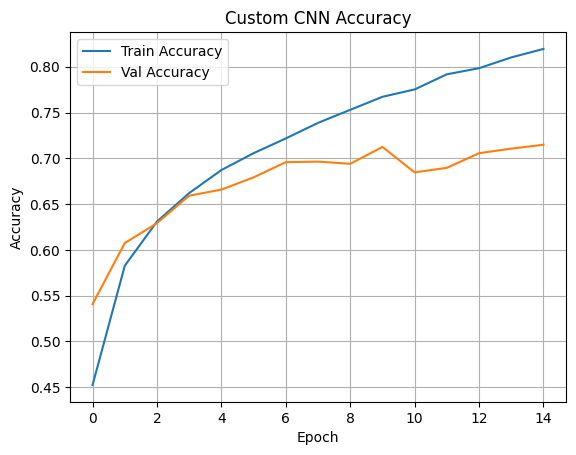

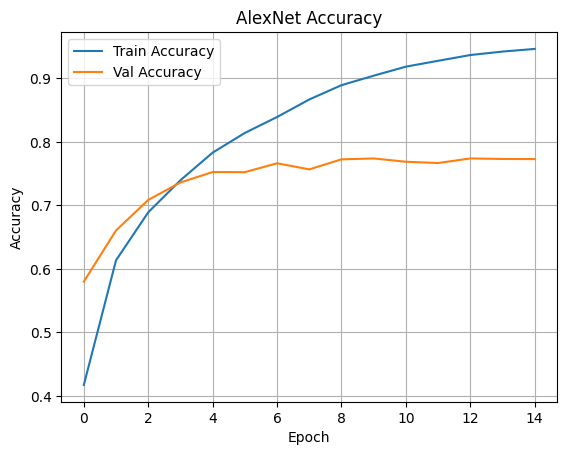

In [ ]:
# Accuracy Plotting
def plot_history(history, name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_custom, "Custom CNN")
plot_history(history_alexnet, "AlexNet")

In [ ]:
# Classification Report (for AlexNet)
print("\n--- Classification Report (AlexNet) ---")
y_pred = alexnet_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cat, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))


--- Classification Report (AlexNet) ---
313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[808  16  44  10  22  11  13  10  41  25]
 [ 15 873   1   5   2   6   7   2  19  70]
 [ 61   7 655  40  81  57  59  29   5   6]
 [ 11  12  67 469  86 227  77  28  10  13]
 [ 17   2  64  34 737  46  31  57   9   3]
 [  7   5  44  92  47 732  27  39   2   5]
 [  4   5  36  32  45  24 843   6   4   1]
 [ 13   2  41  23  63  68   8 774   0   8]
 [ 57  22  17  13   8   6  10   7 840  20]
 [ 33  79  13  12   3  10   3  15  18 814]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.85      0.87      0.86      1000
           2       0.67      0.66      0.66      1000
           3       0.64      0.47      0.54      1000
           4       0.67      0.74      0.70      1000
           5       0.62      0.73      0.67      1000
           6       0.78      0.84      0.81      100